In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Basis Functions

For a unknown function $f : A \to B$, we have some paired observations $\text{\textit{Features}} : A$ and $\text{\textit{Labels}} = \{f(x) + \epsilon \mid x \in \textit{Features}\}$. 
The basic assumption is that there exists $$\hat{f} : A \to B, $$ of the form $$\hat{f}(x) = \sum_{i = 0}^N w_i * \phi_i(x),$$ so that $f$ and $\hat{f}$ are close enough.
Elements in the set of functions $\Phi = \{ \phi_i \}_0^N$ are the __basis functions__.

## Linaer Basis Regression

Given a set of basis functions, $\hat{f}$ is the __linear combination__ of them, i.e. $$\hat{f}(x) = [\phi_0(x), \phi_1(x), \dots, \phi_N(x)] \times \mathbf{w}$$, where $\mathbf{w} = [w_0, \dots w_N] ^ T$ is the __vector__ of weights.
And hence, the task of finding $\mathbf{w}$ based on paired observations so that $f$ and $\hat{f}$ are close enough is a __linear regression__ task.

## Find the Weight

We can simply define that close enough means that $\forall x \in A. \: f(x) = \hat{f}(x) + \varepsilon$.
For paired observations, it means that $\forall x, y \in \text{\textit{Features}}, \text{\textit{Labels}}.\: [\phi_0(x), \phi_1(x), \dots, \phi_N(x)] \times \mathbf{w} = y$.
The object is finding $\mathbf{w}$ for all possible $x$, and hence we stacking the features and labels to obtain $$\Phi(x) \times \mathbf{w} = \mathbf{y},$$ where $\Phi(x)$ is known as the __design matrix__ (cf. PRML 3.16).
The solution of the equation above is that $$\mathbf{w} = \Phi(x)^{-1} \times \mathbf{y}.$$
Note that $\Phi(x)^{-1}$ may not exists, and hence we introduce the __Moore-Penrose pseudo invers__: $(\Phi(x)^T \times \Phi(x))^{-1} \times \Phi(x)^T$.
Finally, we have $$\mathbf{w} = (\Phi(x)^T \times \Phi(x))^{-1} \times \Phi(x)^T \times \mathbf{y}.$$

Linear basis refunction model

# A 1-D Implementation

In [97]:
def normalize(xs):
    '''
    Normalize a ndarray xs
    Input: 
        xs:  ndarray of arbitrary shape
    Return:
        ndarray of the same shape of xs, with zero mean and unit standard deviation.
    '''
    return (xs - np.mean(xs)) / np.std(xs)

def generate_design_matrix(fns, xs):
    '''
    Given a list of functions (fns) and a vector of features (xs, from x_0 to x_n) generate the design matrix.
    Input: 
        fns: [f : A -> B] of length m
        xs:  features, ndarray of shape (n, )
    Return:
        the design matrix (ndarray) of the shape (n, m)
    '''
    return np.column_stack([fn(xs) for fn in fns])

def fit(fns, xs, ys):
    '''
    Given a set of basis functions, paired features and labels, estimate the weights. 
    Input: 
        fns: basis functions, [f : A -> B] of length m
        xs:  ndarray of shape (n, )
        ys: ndarray of shape (n, )
    Return:
        weights: ndarray of shape (m, )
    '''
    pseudo_inv = lambda x: np.linalg.inv(x.T @ x) @ x.T
    design_matrix = generate_design_matrix(fns, xs)
    return pseudo_inv(design_matrix) @ ys
    
    

def predict(fns, weights, xs):
    '''
    Given a set of basis functions, corresponding weights and features, return predicted labels. 
    Input: 
        fns: [f : A -> B] of length m
        weights: ndarray of shape (m, )
        xs:  ndarray of shape (n, )
    Return:
        predicted labels (ndarray of shape (n, ))
    '''
    design_matrix = generate_design_matrix(fns, xs)
    return design_matrix @ weights

# A Toy Dataset

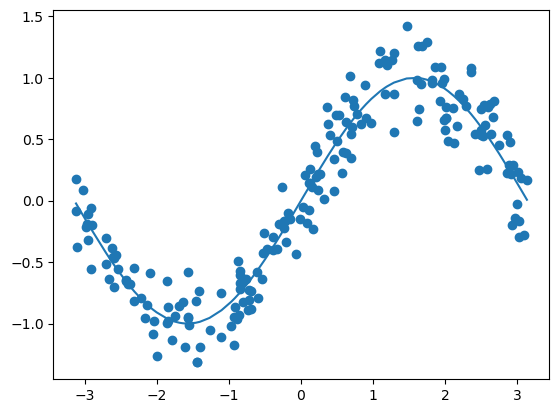

In [121]:
# a toy data set generated from the sine function
npt = 200
features = (np.random.rand(npt) - 0.5) * 2*np.pi
features = np.sort(features) #for drawing only
labels = np.sin(features) + np.random.normal(scale=0.2, size=features.shape[0])
ground_truth = np.sin(features)

plt.plot(features, ground_truth)
plt.scatter(features, labels)

# Polynomial Regression

$\hat{f}(x) = w_0 + w_1x^1 + \dots w_kx^k$ and hence $\phi_i(x) = x^i$

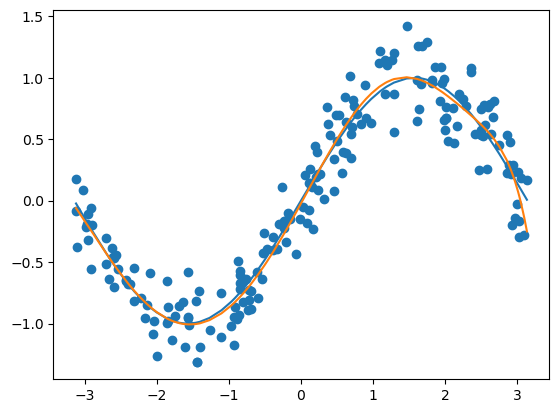

In [125]:
order = 10

def p(i):
    return lambda x: x**i

basis_functions = [p(i) for i in range(order)]

w = fit(basis_functions, features, labels)
labels_pred = predict(basis_functions, w, features)

plt.plot(features, ground_truth)
plt.plot(features, labels_pred)
plt.scatter(features, labels)


# Regression W/ the Gaussian Basis function

$\hat{f}(x) = w_0 + w_1\phi_1(x) + w_k\phi_k(x)$ where $\phi_i(x) = e^{-\frac{(x - \mu_i)^2}{2s^2}}$

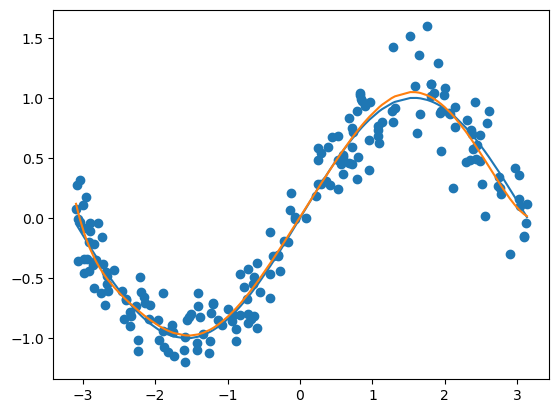

In [120]:
n_component = 9

def gaussian_basis(mu):
    s = 1
    return lambda x: np.exp(-1 * (x-mu)**2 / (2*s**2))

basis_functions = [gaussian_basis(i) for i in np.linspace(-2*np.pi, 2*np.pi, n_component)]

w = fit(basis_functions, features, labels)
labels_pred = predict(basis_functions, w, features)

plt.plot(features, ground_truth)
plt.plot(features, labels_pred)
plt.scatter(features, labels)